# Student Performance EDA Regression
Melakukan pemanggilan file .csv dari [repositori github](https://github.com/nekonynn/FGABatch2_Big-Data/tree/master/student) yang telah didapat dari [website UCI](https://archive.ics.uci.edu/ml/datasets/student+performance)

In [0]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

url_mat = 'https://raw.githubusercontent.com/nekonynn/FGABatch2_Big-Data/master/student/student-mat.csv'
url_por = 'https://raw.githubusercontent.com/nekonynn/FGABatch2_Big-Data/master/student/student-por.csv'
df_mat = pd.read_csv(url_mat, sep=";", usecols = ['absences','G1','G2','G3'])
df_por = pd.read_csv(url_por, sep=";", usecols = ['absences','G1','G2','G3'])
df_mat

,absences,G1,G2,G3
0,6,5,6,6
1,4,5,5,6
2,10,7,8,10
3,2,15,14,15
4,4,6,10,10
...,...,...,...,...
390,11,9,9,9
391,3,14,16,16
392,3,10,8,7
393,0,11,12,10


In [0]:
df_por

,absences,G1,G2,G3
0,4,0,11,11
1,2,9,11,11
2,6,12,13,12
3,0,14,14,14
4,0,11,13,13
...,...,...,...,...
644,4,10,11,10
645,4,15,15,16
646,6,11,12,9
647,6,10,10,10


**Pengecekan data kosong** pada dataset dengan menggunakan referensi di notebook pada [Kaggle](https://www.kaggle.com/fatihbilgin/data-science-bowl-2019-data-visualization)

In [0]:
print(df_mat.loc[:, df_mat.isnull().any()].isnull().sum())
print(df_por.loc[:, df_por.isnull().any()].isnull().sum())

Series([], dtype: float64)
Series([], dtype: float64)


Berarti dataset yang digunakan tidak memiliki data yang kosong

In [0]:
print("Jumlah baris pada Dataset Siswa di pelajaran Matematika: {0} \nJumlah kolom pada Dataset Siswa di pelajaran Matematika: {1}\n".format(df_mat.shape[0], df_mat.shape[1]))
print("Jumlah baris pada Dataset Siswa di pelajaran Bahasa Portugis: {0} \nJumlah kolom pada Dataset Siswa di pelajaran Bahasa Portugis: {1}".format(df_por.shape[0], df_por.shape[1]))

Jumlah baris pada Dataset Siswa di pelajaran Matematika: 395 
Jumlah kolom pada Dataset Siswa di pelajaran Matematika: 4

Jumlah baris pada Dataset Siswa di pelajaran Bahasa Portugis: 649 
Jumlah kolom pada Dataset Siswa di pelajaran Bahasa Portugis: 4


In [0]:
df_mat.describe().T

,count,mean,std,min,25%,50%,75%,max
absences,395.0,5.708861,8.003096,0.0,0.0,4.0,8.0,75.0
G1,395.0,10.908861,3.319195,3.0,8.0,11.0,13.0,19.0
G2,395.0,10.713924,3.761505,0.0,9.0,11.0,13.0,19.0
G3,395.0,10.415190,4.581443,0.0,8.0,11.0,14.0,20.0


In [0]:
df_por.describe().T

,count,mean,std,min,25%,50%,75%,max
absences,649.0,3.659476,4.640759,0.0,0.0,2.0,6.0,32.0
G1,649.0,11.399076,2.745265,0.0,10.0,11.0,13.0,19.0
G2,649.0,11.570108,2.913639,0.0,10.0,11.0,13.0,19.0
G3,649.0,11.906009,3.230656,0.0,10.0,12.0,14.0,19.0


### Mengkonversi jumlah ketidakhadiran pada kedua mata pelajaran ke persen kehadiran

In [0]:
jml_kehadiran = 93
persen_kehadiran_mat = []
persen_kehadiran_por = []
for jml_tdk_hdr_mat in df_mat['absences']:
  persen_kehadiran = ((jml_kehadiran - jml_tdk_hdr_mat) / jml_kehadiran) * 100
  persen_kehadiran_mat.append(float(f'{persen_kehadiran:.2f}'))
for jml_tdk_hdr_por in df_por['absences']:
  persen_kehadiran = ((jml_kehadiran - jml_tdk_hdr_por) / jml_kehadiran) * 100
  persen_kehadiran_por.append(float(f'{persen_kehadiran:.2f}'))

### Menambahkan data persen kehadiran ke dalam dataframe baru

In [0]:
df_mat_n = df_mat.assign(presences = persen_kehadiran_mat)
df_mat_n

,absences,G1,G2,G3,presences
0,6,5,6,6,93.55
1,4,5,5,6,95.70
2,10,7,8,10,89.25
3,2,15,14,15,97.85
4,4,6,10,10,95.70
...,...,...,...,...,...
390,11,9,9,9,88.17
391,3,14,16,16,96.77
392,3,10,8,7,96.77
393,0,11,12,10,100.00


In [0]:
df_por_n = df_por.assign(presences = persen_kehadiran_por)
df_por_n

,absences,G1,G2,G3,presences
0,4,0,11,11,95.70
1,2,9,11,11,97.85
2,6,12,13,12,93.55
3,0,14,14,14,100.00
4,0,11,13,13,100.00
...,...,...,...,...,...
644,4,10,11,10,95.70
645,4,15,15,16,95.70
646,6,11,12,9,93.55
647,6,10,10,10,93.55


### Menampilkan statistik tingkat kehadiran untuk DataFrame untuk pelajaran Bahasa Portugis

In [0]:
df_por_n.describe().T

,count,mean,std,min,25%,50%,75%,max
absences,649.0,3.659476,4.640759,0.00,0.00,2.00,6.0,32.0
G1,649.0,11.399076,2.745265,0.00,10.00,11.00,13.0,19.0
G2,649.0,11.570108,2.913639,0.00,10.00,11.00,13.0,19.0
G3,649.0,11.906009,3.230656,0.00,10.00,12.00,14.0,19.0
presences,649.0,96.065578,4.989478,65.59,93.55,97.85,100.0,100.0


In [0]:
df_por_n['presences'].value_counts()

100.00    244
97.85     110
95.70      93
93.55      49
91.40      42
89.25      21
87.10      12
98.92      12
94.62      12
82.80      10
84.95       8
96.77       7
90.32       7
88.17       5
80.65       3
92.47       3
77.42       2
76.34       2
83.87       2
74.19       1
67.74       1
86.02       1
72.04       1
65.59       1
Name: presences, dtype: int64

### Mengelompokkan masing-masing data berdasarkan presensi pada mata pelajaran bahasa Portugis

In [0]:
kehadiran_por = []
nilai_akhir_por = []

## List yang berisi absensi 100%
list_100 = []
## List yang berisi >= 90% & < 100%
list_90 = []
## List yang berisi >= 80% & < 90%
list_80 = []
## List yang berisi < 80%
list_u80 = []

## List yang berisi nilai 0 < x < 5

for index, row in df_por_n.iterrows():
  presence = row['presences']
  G3 = row['G3']
  if presence == 100:
    list_100.append(presence)
    kehadiran_por.append(4)
  elif presence >= 90 and presence < 100:
    list_90.append(presence)
    kehadiran_por.append(3)
  elif presence >= 80 and presence < 90:
    list_80.append(presence)
    kehadiran_por.append(2)
  elif presence < 80:
    list_u80.append(presence)
    kehadiran_por.append(1)

  if G3 >= 0 and G3 <= 5:
    nilai_akhir_por.append(1)
  elif G3 >= 6 and G3 <= 10:
    nilai_akhir_por.append(2)
  elif G3 >= 11 and G3 <= 15:
    nilai_akhir_por.append(3)
  elif G3 >= 16 and G3 <= 20:
    nilai_akhir_por.append(4)

### Menampilkan grafik pie untuk persentase kehadiran siswa pada pelajaran bahasa Portugis

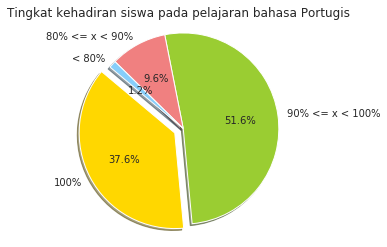

In [0]:
import matplotlib.pyplot as plt

# Data to plot
labels = '100%', '90% <= x < 100%', '80% <= x < 90%', '< 80%'
sizes = [len(list_100), len(list_90), len(list_80), len(list_u80)]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Tingkat kehadiran siswa pada pelajaran bahasa Portugis')
plt.axis('equal')
plt.show()

#### Dapat disimpulkan siswa dengan tingkat kehadiran di atas 90% pada pelajaran bahasa Portugis sebanyak **89.2% dari 649 siswa** atau **579 siswa**

### Menampilkan grafik korelasi

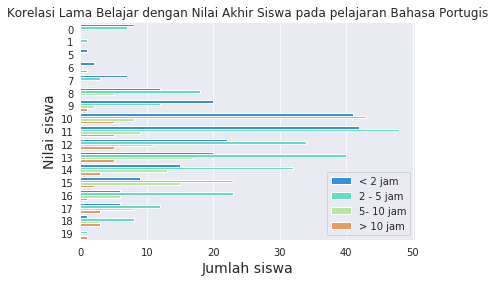

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_por_all = pd.read_csv(url_por, sep=";")
df_por_all = df_por_all.assign(presences_percent = persen_kehadiran_por, presences = kehadiran_por, grades = nilai_akhir_por)

sns.set_style('darkgrid')
sns.countplot(y='G3', hue='studytime', data=df_por_all, palette='rainbow')
plt.title('Korelasi Lama Belajar dengan Nilai Akhir Siswa pada pelajaran Bahasa Portugis')
plt.legend(['< 2 jam', '2 - 5 jam', '5- 10 jam', '> 10 jam'])
plt.xlabel('Jumlah siswa', fontsize=14)
plt.ylabel('Nilai siswa', fontsize=14)
plt.show()

Dapat disimpulkan bahwa **lama belajar** ***di bawah 2 jam*** serta ***2 hingga 5 jam*** cenderung efektif pada **nilai siswa** dengan kategori ***2 (5 hingga 10)*** dan ***3 (11 hingga 15)***. Serta, bahwa **lama belajar** ***2 hingga 5 jam*** serta ***5 hingga 10 jam*** cenderung efektif pada **nilai siswa** dengan kategori ***3 (10 hingga 15)*** dan ***4 (15 hingga 20)***

#### Masukkan 2 pelajaran yaitu Portugis & Matematika, ubah ke dalam histogram

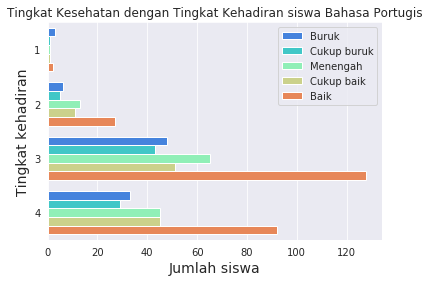

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df_por_all = pd.read_csv(url_por, sep=";")
df_por_all = df_por_all.assign(presences_percent = persen_kehadiran_por, presences = kehadiran_por)

sns.set_style('darkgrid')
sns.countplot(y='presences', hue='health', data=df_por_all, palette='rainbow')
# plt.scatter(df_por_all['presences'], df_por_all['health'], color="red", alpha=.5)
plt.title('Tingkat Kesehatan dengan Tingkat Kehadiran siswa Bahasa Portugis')
plt.legend(['Buruk', 'Cukup buruk', 'Menengah', 'Cukup baik', 'Baik'])
plt.xlabel('Jumlah siswa', fontsize=14)
plt.ylabel('Tingkat kehadiran', fontsize=14)
plt.show()

Dapat disimpulkan bahwa **terdapat hubungan** antara ***tingkat kesehatan siswa*** dengan ***tingkat kehadiran siswa*** sebab jumlah siswa dengan ***tingkat kesehatan menengah hingga cukup baik*** masih lebih tinggi dibandingkan dengan jumlah siswa dengan ***tingkat kesehatan buruk dan cukup buruk*** pada ***tingkat kehadiran 80 persen hingga 100 persen***.

### Melakukan multiple linear regression pada nilai harian terhadap nilai akhir siswa pada pelajaran bahasa Portugis

In [0]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split

random_seed = 20
var_bebas = []
x1 = []
x2 = []
var_terikat = df_por_n['G3']

# Memasukkan data pada G1 dan G2 ke dalam array variabel
for x in range(df_por_n['G3'].count()):
  var_bebas.append([df_por_n['G1'][x], df_por_n['G2'][x]])

x_train, x_test, y_train, y_test = train_test_split(var_bebas, var_terikat, test_size=0.2, random_state = random_seed)

for x in range(len(x_test)):
  x1.append(x_test[x][0])
  x2.append(x_test[x][1])

x = np.array(x_train)
y = np.array(y_train)

model = LinearRegression().fit(x, y)

### Menampilkan hasil multiple linear regression

In [0]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8426579362208593
intercept: -0.2599859819478372
slope: [0.14630479 0.90551519]


### Mencoba hasil prediksi menggunakan model Multiple Linear Regression yang telah dibuat

In [0]:
y_predict = model.predict(x_test)
diff_abs = []
ar_y_test = np.asarray(y_test)
for index in range(len(y_test)):
  diff_abs.append(abs(y_predict[index] - ar_y_test[index]))
  
df_comp = pd.DataFrame(dict(prediksi=y_predict, test=y_test, diff_abs=diff_abs, x1=x1, x2=x2))
df_comp = df_comp.sort_values(by=['x1', 'x2'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_comp)

      prediksi  test  diff_abs  x1  x2
605   0.471538     0  0.471538   5   0
432   6.050934     7  0.949066   6   6
500   6.956449     7  0.043551   6   7
581   7.861964     8  0.138036   6   8
642   8.767480    11  2.232520   6   9
175   6.197239     8  1.802761   7   6
347   7.102754     8  0.897246   7   7
284   8.008269     6  2.008269   7   8
632   8.008269     9  0.991731   7   8
585   7.249059     8  0.750941   8   7
178   8.154574     8  0.154574   8   8
18    8.154574     7  1.154574   8   8
305   8.154574     9  0.845426   8   8
586   8.154574     0  8.154574   8   8
522   8.154574     8  0.154574   8   8
219   9.060089     8  1.060089   8   9
148   9.060089     9  0.060089   8   9
421   9.965604    10  0.034396   8  10
173   8.300879    10  1.699121   9   8
493   9.206394    10  0.793606   9   9
528   9.206394     9  0.206394   9   9
136   9.206394    11  1.793606   9   9
444  10.111909    11  0.888091   9  10
576  10.111909    11  0.888091   9  10
283  11.017424    10  1.0

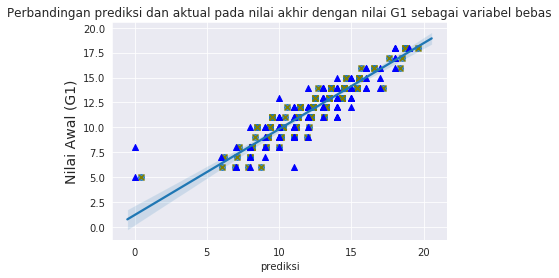

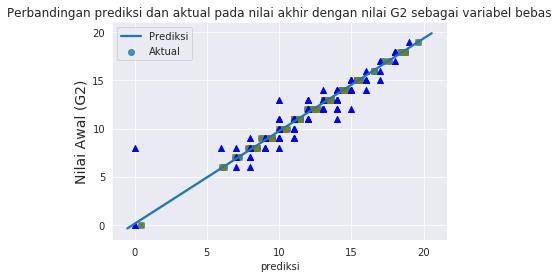

In [0]:
from scipy.signal import find_peaks

#plt.plot( 'x1', 'y1', data=url_por, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
sns.regplot(x='prediksi', y='x1', data=df_comp)
plt.scatter('prediksi', 'x1', data=df_comp, marker='x', color='olive')
plt.scatter('test', 'x1', data=df_comp, marker='^', color='blue') 
plt.title('Perbandingan prediksi dan aktual pada nilai akhir dengan nilai G1 sebagai variabel bebas')
plt.ylabel('Nilai Awal (G1)', fontsize=14)
plt.show()

sns.regplot(x='prediksi', y='x2', data=df_comp)
plt.scatter('prediksi', 'x2', data=df_comp, marker='x', color='olive')
plt.scatter('test', 'x2', data=df_comp, marker='^', color='blue')
plt.title('Perbandingan prediksi dan aktual pada nilai akhir dengan nilai G2 sebagai variabel bebas')
plt.legend(['Prediksi', 'Aktual'])
plt.ylabel('Nilai Awal (G2)', fontsize=14)
plt.show()

In [0]:
from sklearn import metrics
print("MAE: ", metrics.mean_absolute_error(y_test, y_predict))
print("MSE: ", metrics.mean_squared_error(y_test, y_predict))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE:  0.7654759217611342
MSE:  1.3242338489978516
RMSE:  1.1507536004713832
